In [15]:
%load_ext autoreload
%autoreload 2
import yaml
import os
os.chdir("/scratch/ewalt/pdm/rs-uncertainty")
from src.metrics import StratifiedRCU

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
path = "results/2023-04-06_10-52-04_baseline-with-spatial-correlation/rcu.json"

In [35]:
with open("config/evaluate_testset/baseline.yaml", "r") as f:
    cfg = yaml.safe_load(f)

In [47]:
rcu = StratifiedRCU.from_json(path)

In [83]:
rcu.get_results_df(
        groups={"east": cfg["projects_east"], "west": cfg["projects_west"], "north": cfg["projects_north"]},
        variable_names=cfg["variable_names"]
    )

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:247: RuntimeWarning: invalid value encountered in true_divide
  result = np.nansum(result, axis=self.bins_axis, keepdims=True)/np.nansum(histogram, axis=(self.groups_axis,self.bins_axis), keepdims=True)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:262: RuntimeWarning: invalid value encountered in true_divide
  result = np.abs(result)/np.sqrt(np.nansum(histogram*arrs[0], axis=self.groups_axis, keepdims=True))
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:263: RuntimeWarning: invalid value encountered in true_divide
  result = np.nansum(result, axis=self.bins_axis, keepdims=True)/np.nansum(histogram, axis=(self.groups_axis,self.bins_axis), keepdims=True)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:338: Runtime

In [84]:
rcu.results

,group,metric,kind,variable,x
0,439,mse,agg,P95,9.476051
1,439,mse,agg,MeanH,4.889072
2,439,mse,agg,Dens,0.014802
3,439,mse,agg,Gini,0.002589
4,439,mse,agg,Cover,0.019557
...,...,...,...,...,...
3735,global,srp,ause,P95,5.328003
3736,global,srp,ause,MeanH,2.619877
3737,global,srp,ause,Dens,0.006605
3738,global,srp,ause,Gini,0.001388


In [85]:
pd.DataFrame.from_dict(rcu.results.to_dict(orient="list"))

,group,metric,kind,variable,x
0,439,mse,agg,P95,9.476051
1,439,mse,agg,MeanH,4.889072
2,439,mse,agg,Dens,0.014802
3,439,mse,agg,Gini,0.002589
4,439,mse,agg,Cover,0.019557
...,...,...,...,...,...
3735,global,srp,ause,P95,5.328003
3736,global,srp,ause,MeanH,2.619877
3737,global,srp,ause,Dens,0.006605
3738,global,srp,ause,Gini,0.001388


In [94]:
rcu.save_json(path)

In [95]:
with open(path, "r") as f:
    data = json.load(f)

In [96]:
pd.DataFrame.from_dict(data["results"])

,group,metric,kind,variable,x
0,439,mse,agg,P95,9.476051
1,439,mse,agg,MeanH,4.889072
2,439,mse,agg,Dens,0.014802
3,439,mse,agg,Gini,0.002589
4,439,mse,agg,Cover,0.019557
...,...,...,...,...,...
3735,global,srp,ause,P95,5.328003
3736,global,srp,ause,MeanH,2.619877
3737,global,srp,ause,Dens,0.006605
3738,global,srp,ause,Gini,0.001388


In [93]:
rcu.results.to_dict(orient="list")["group"][1]

'439'

In [97]:
data["results"]["group"][1]

'439'

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:698: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:747: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


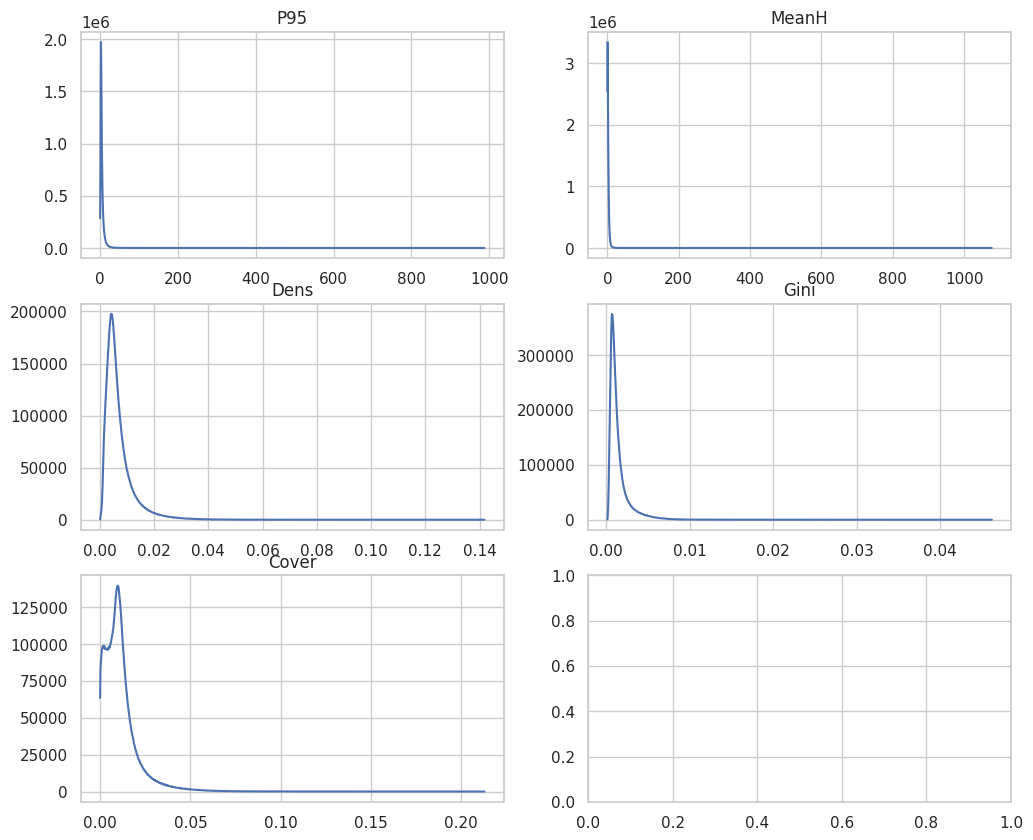

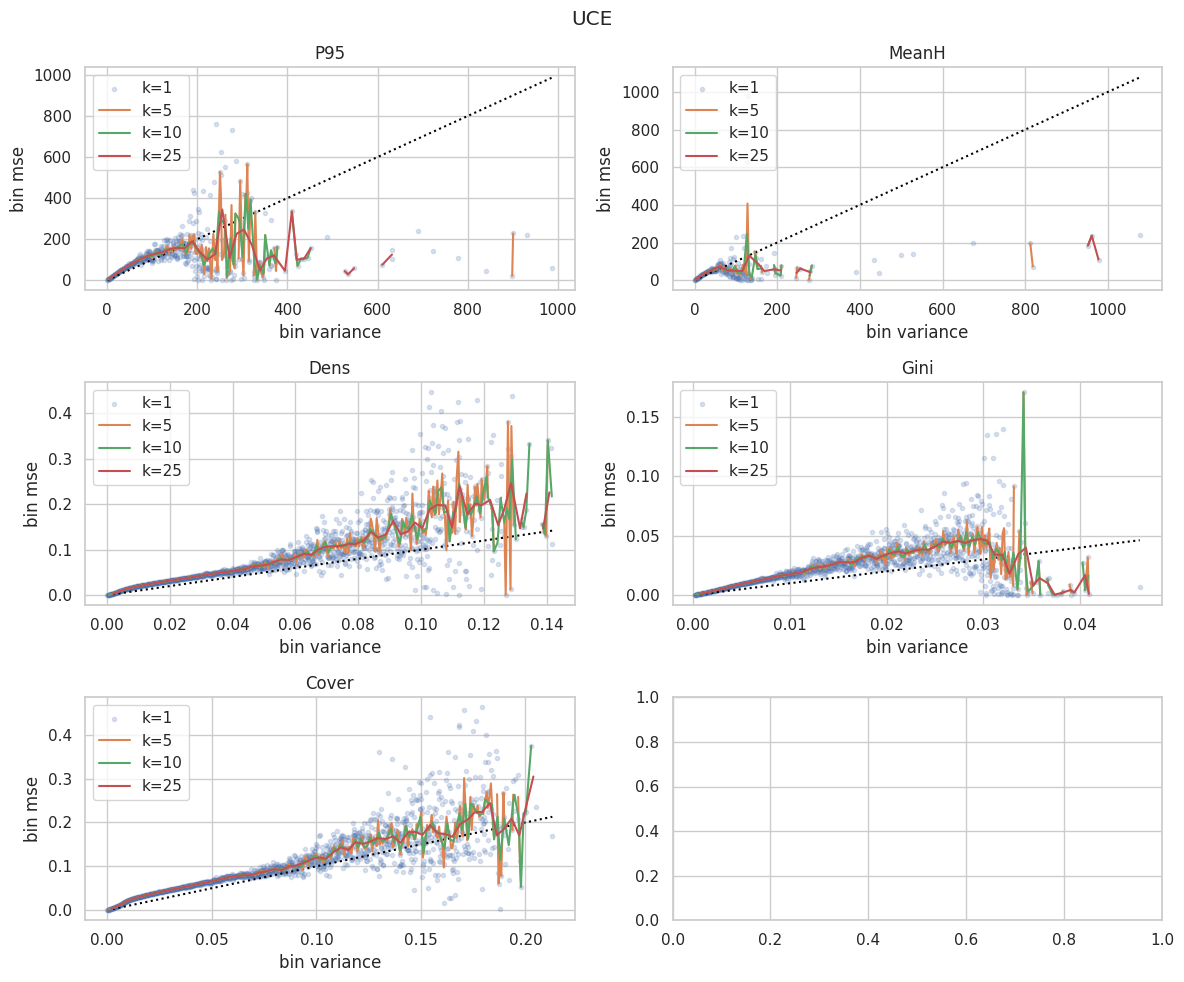

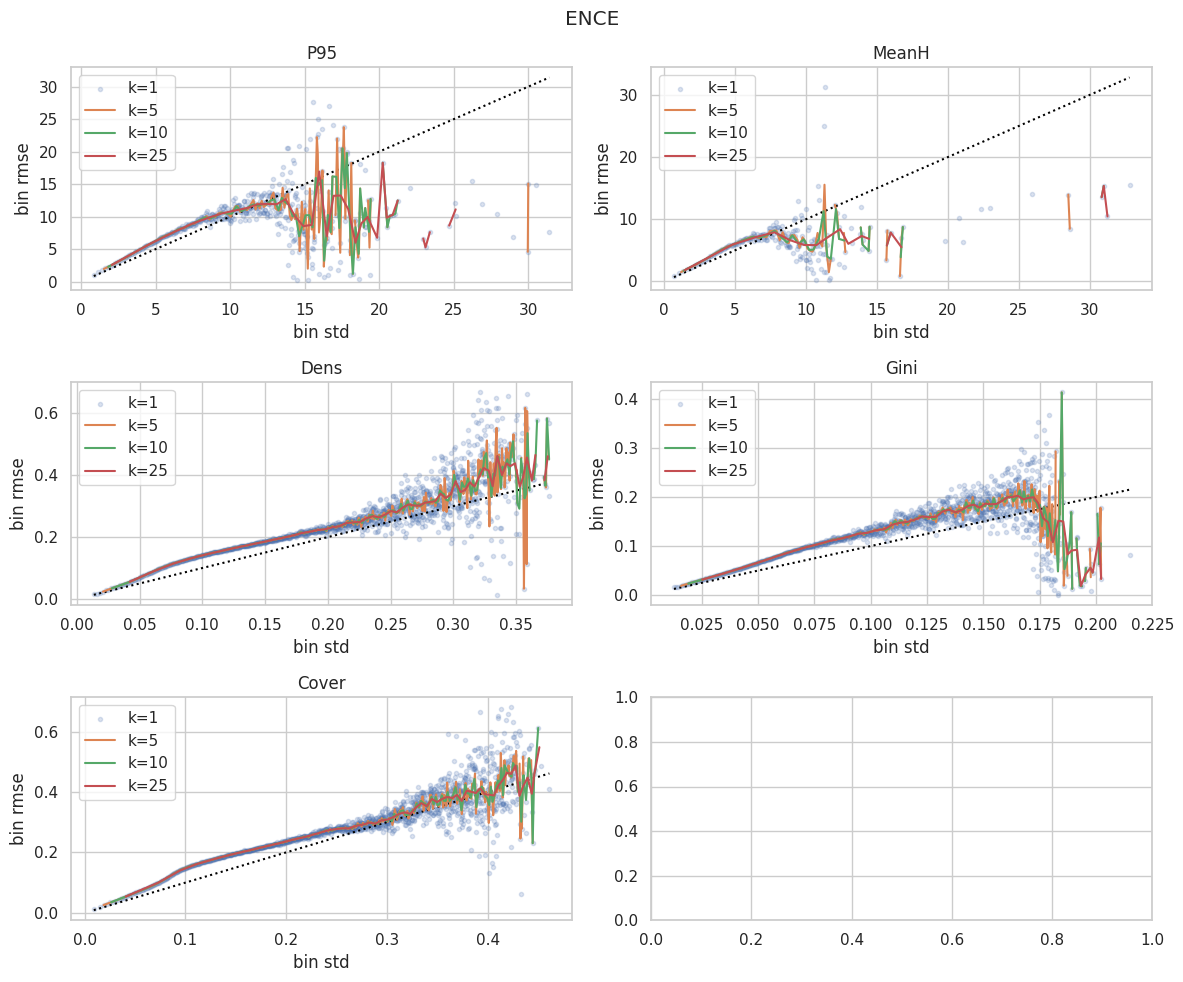

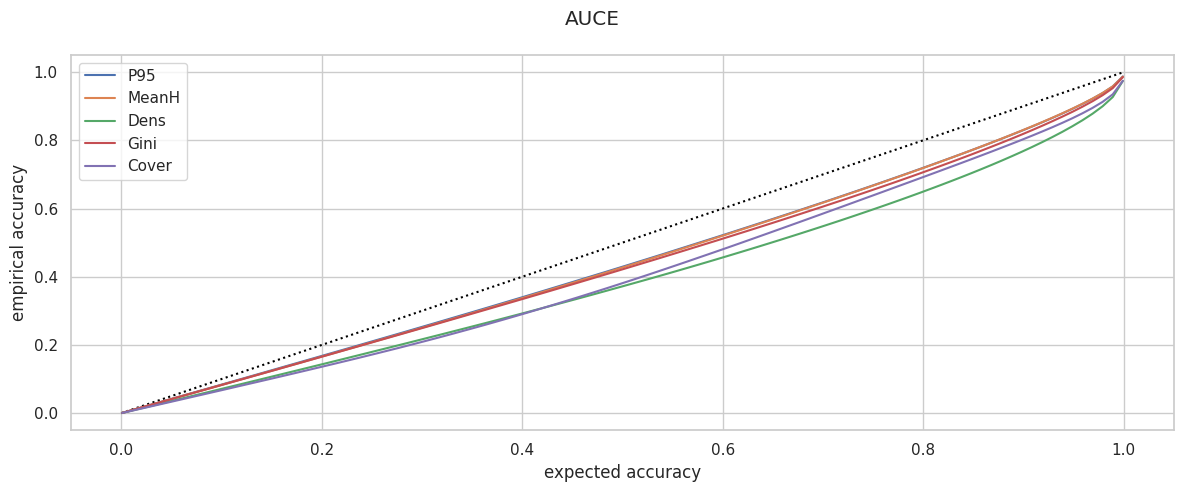

In [46]:
rcu.plot_calibration_curves(
    ks=cfg["upsampling_coeffs"], 
    variable_names=cfg["variable_names"],
    metrics=["uce", "ence", "auce"]
)

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  return np.nansum(values*counts, axis=axis, keepdims=keepdims)/np.nansum(counts, axis=axis, keepdims=keepdims)
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:28: RuntimeWarning: invalid value encountered in true_divide
  

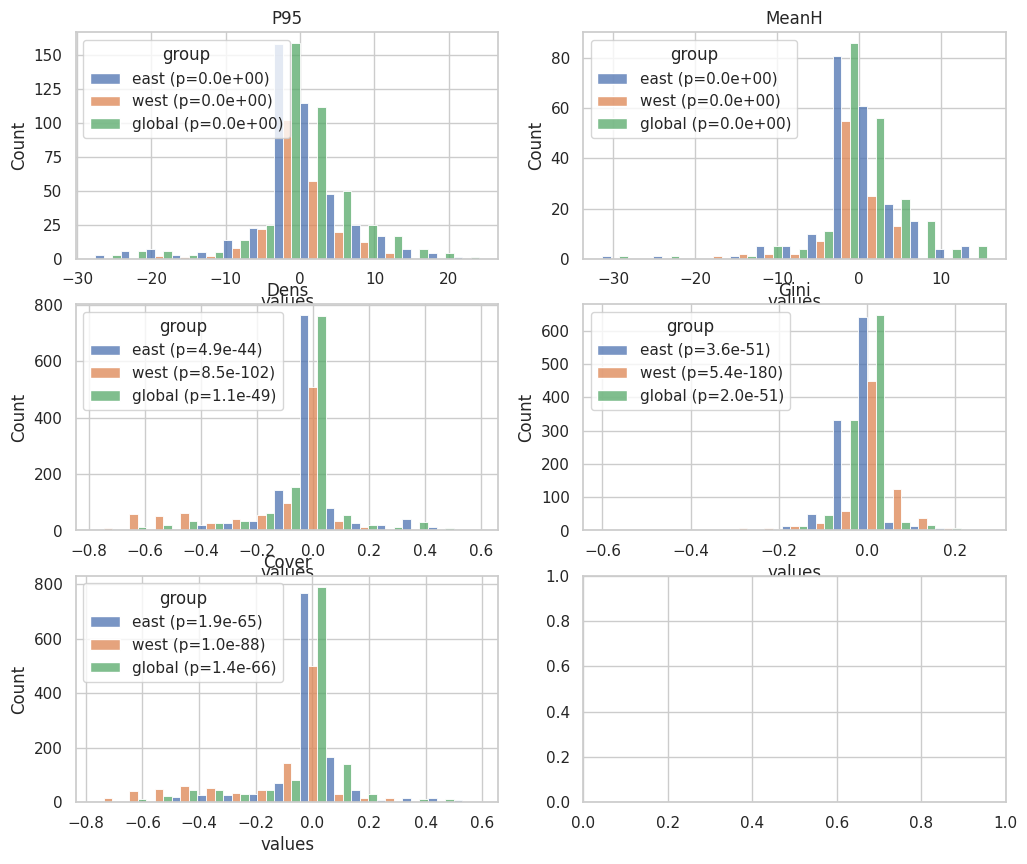

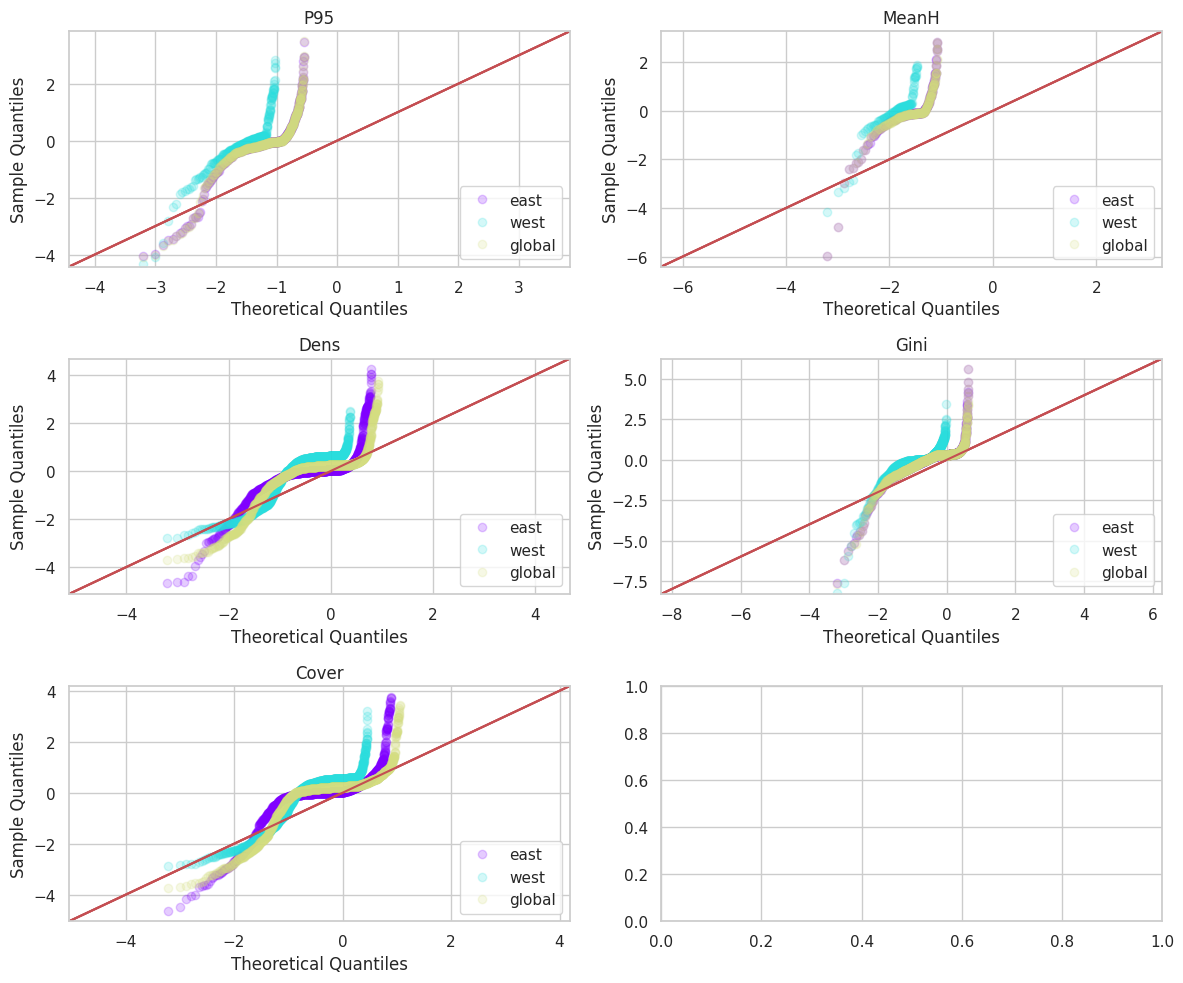

In [79]:
rcu.plot_residuals(
    groups={"east": cfg["projects_east"], "west": cfg["projects_west"], "north": cfg["projects_north"]},
    variable_names=cfg["variable_names"]
)

/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:664: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:664: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:664: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:664: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/scratch/ewalt/pdm/rs-uncertainty/src/metrics.py:664: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, 

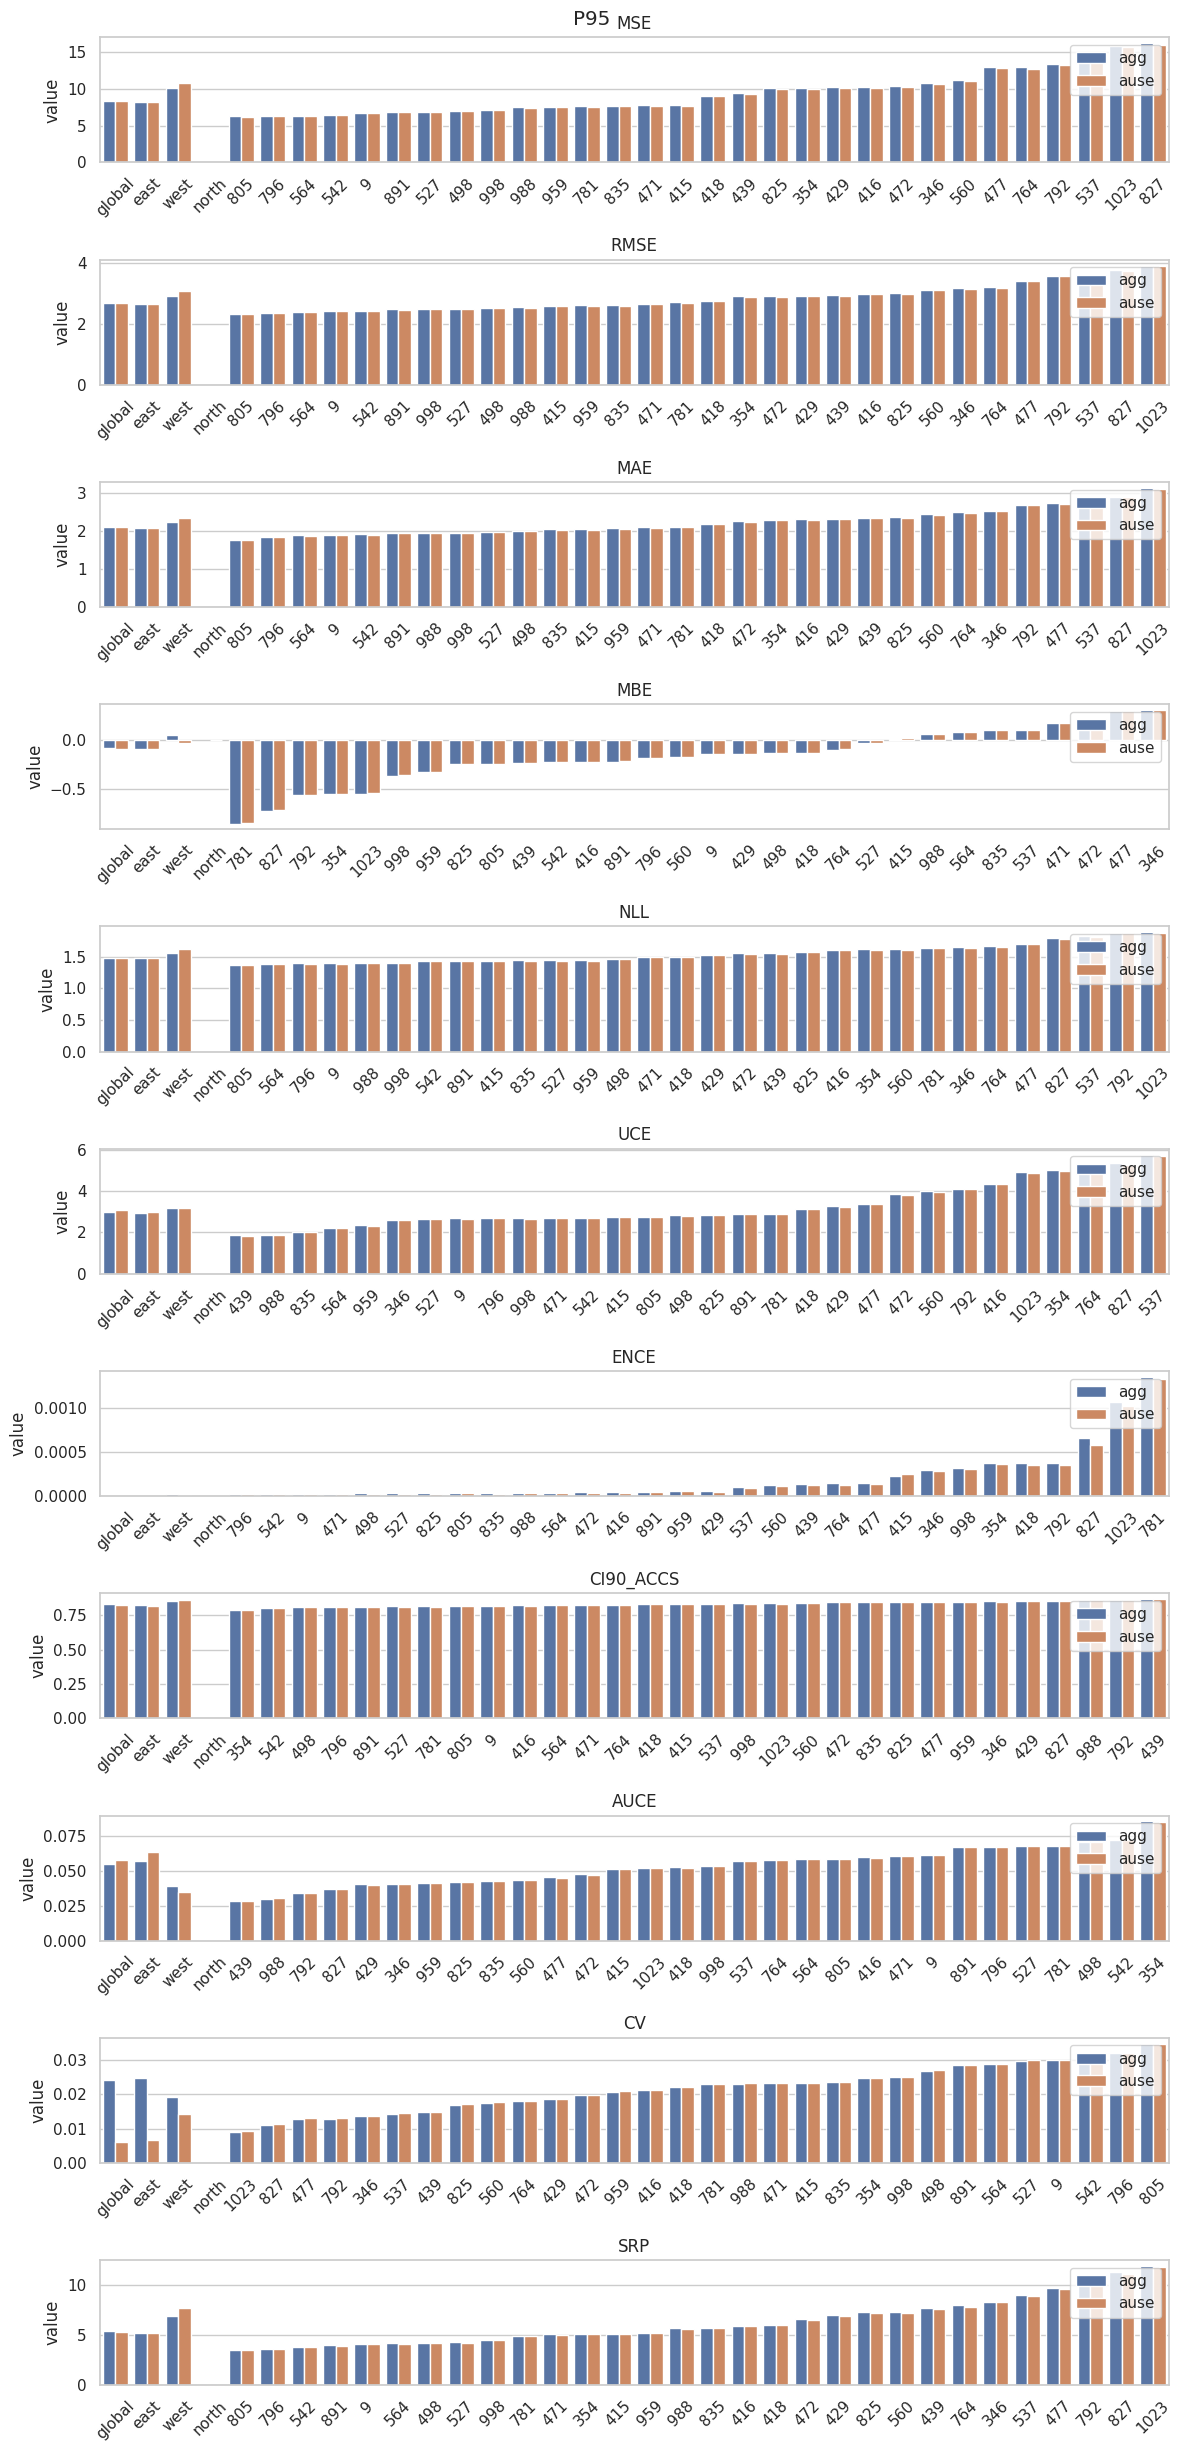

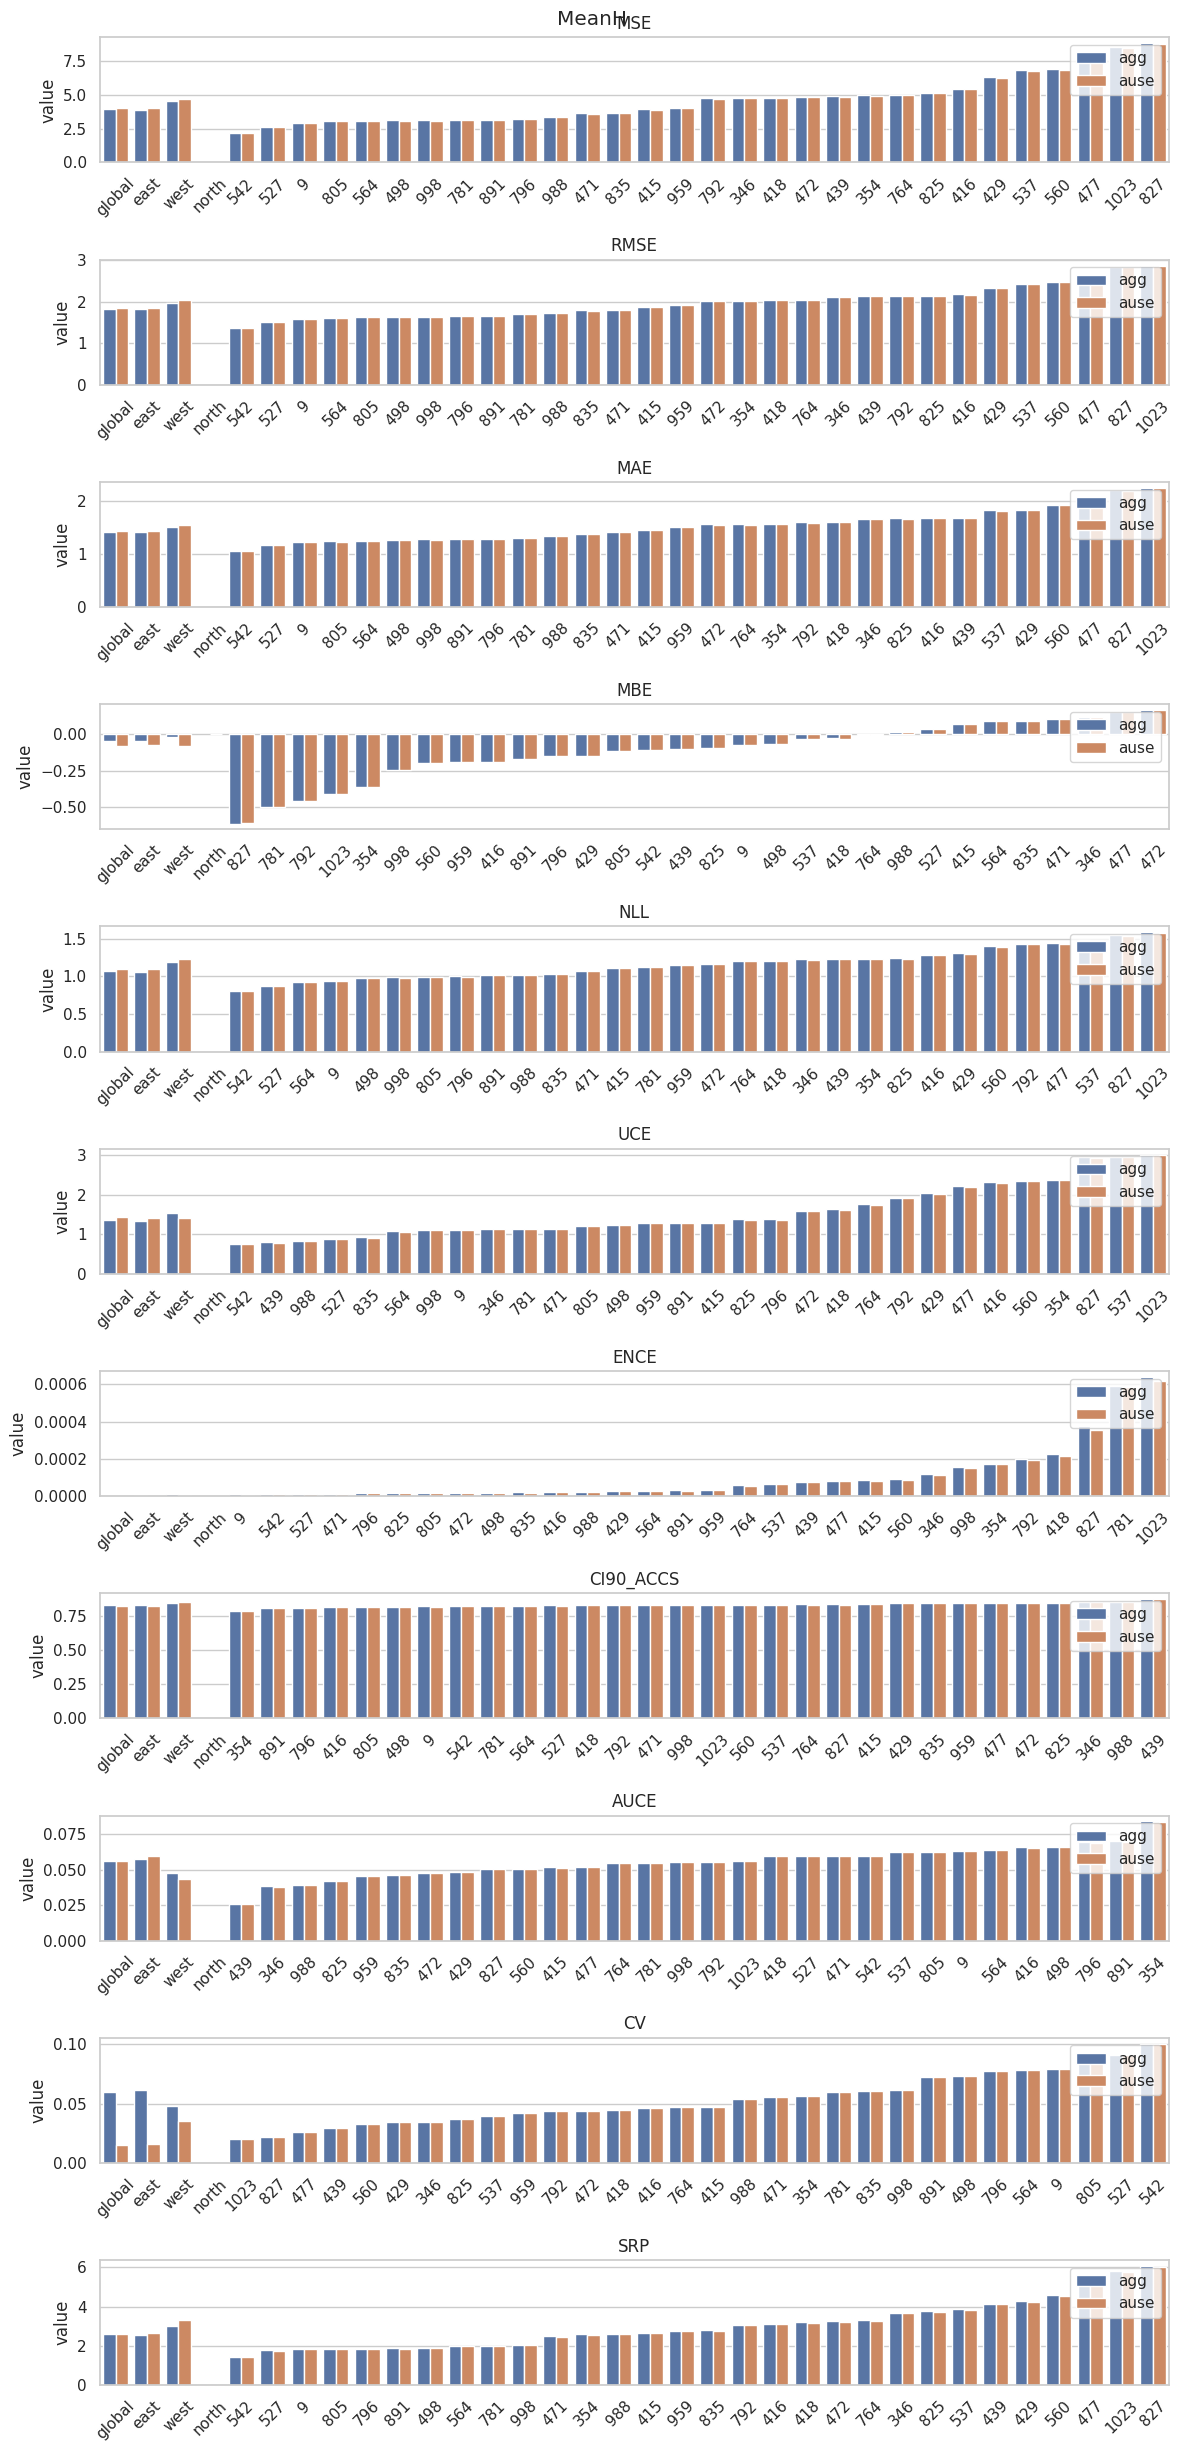

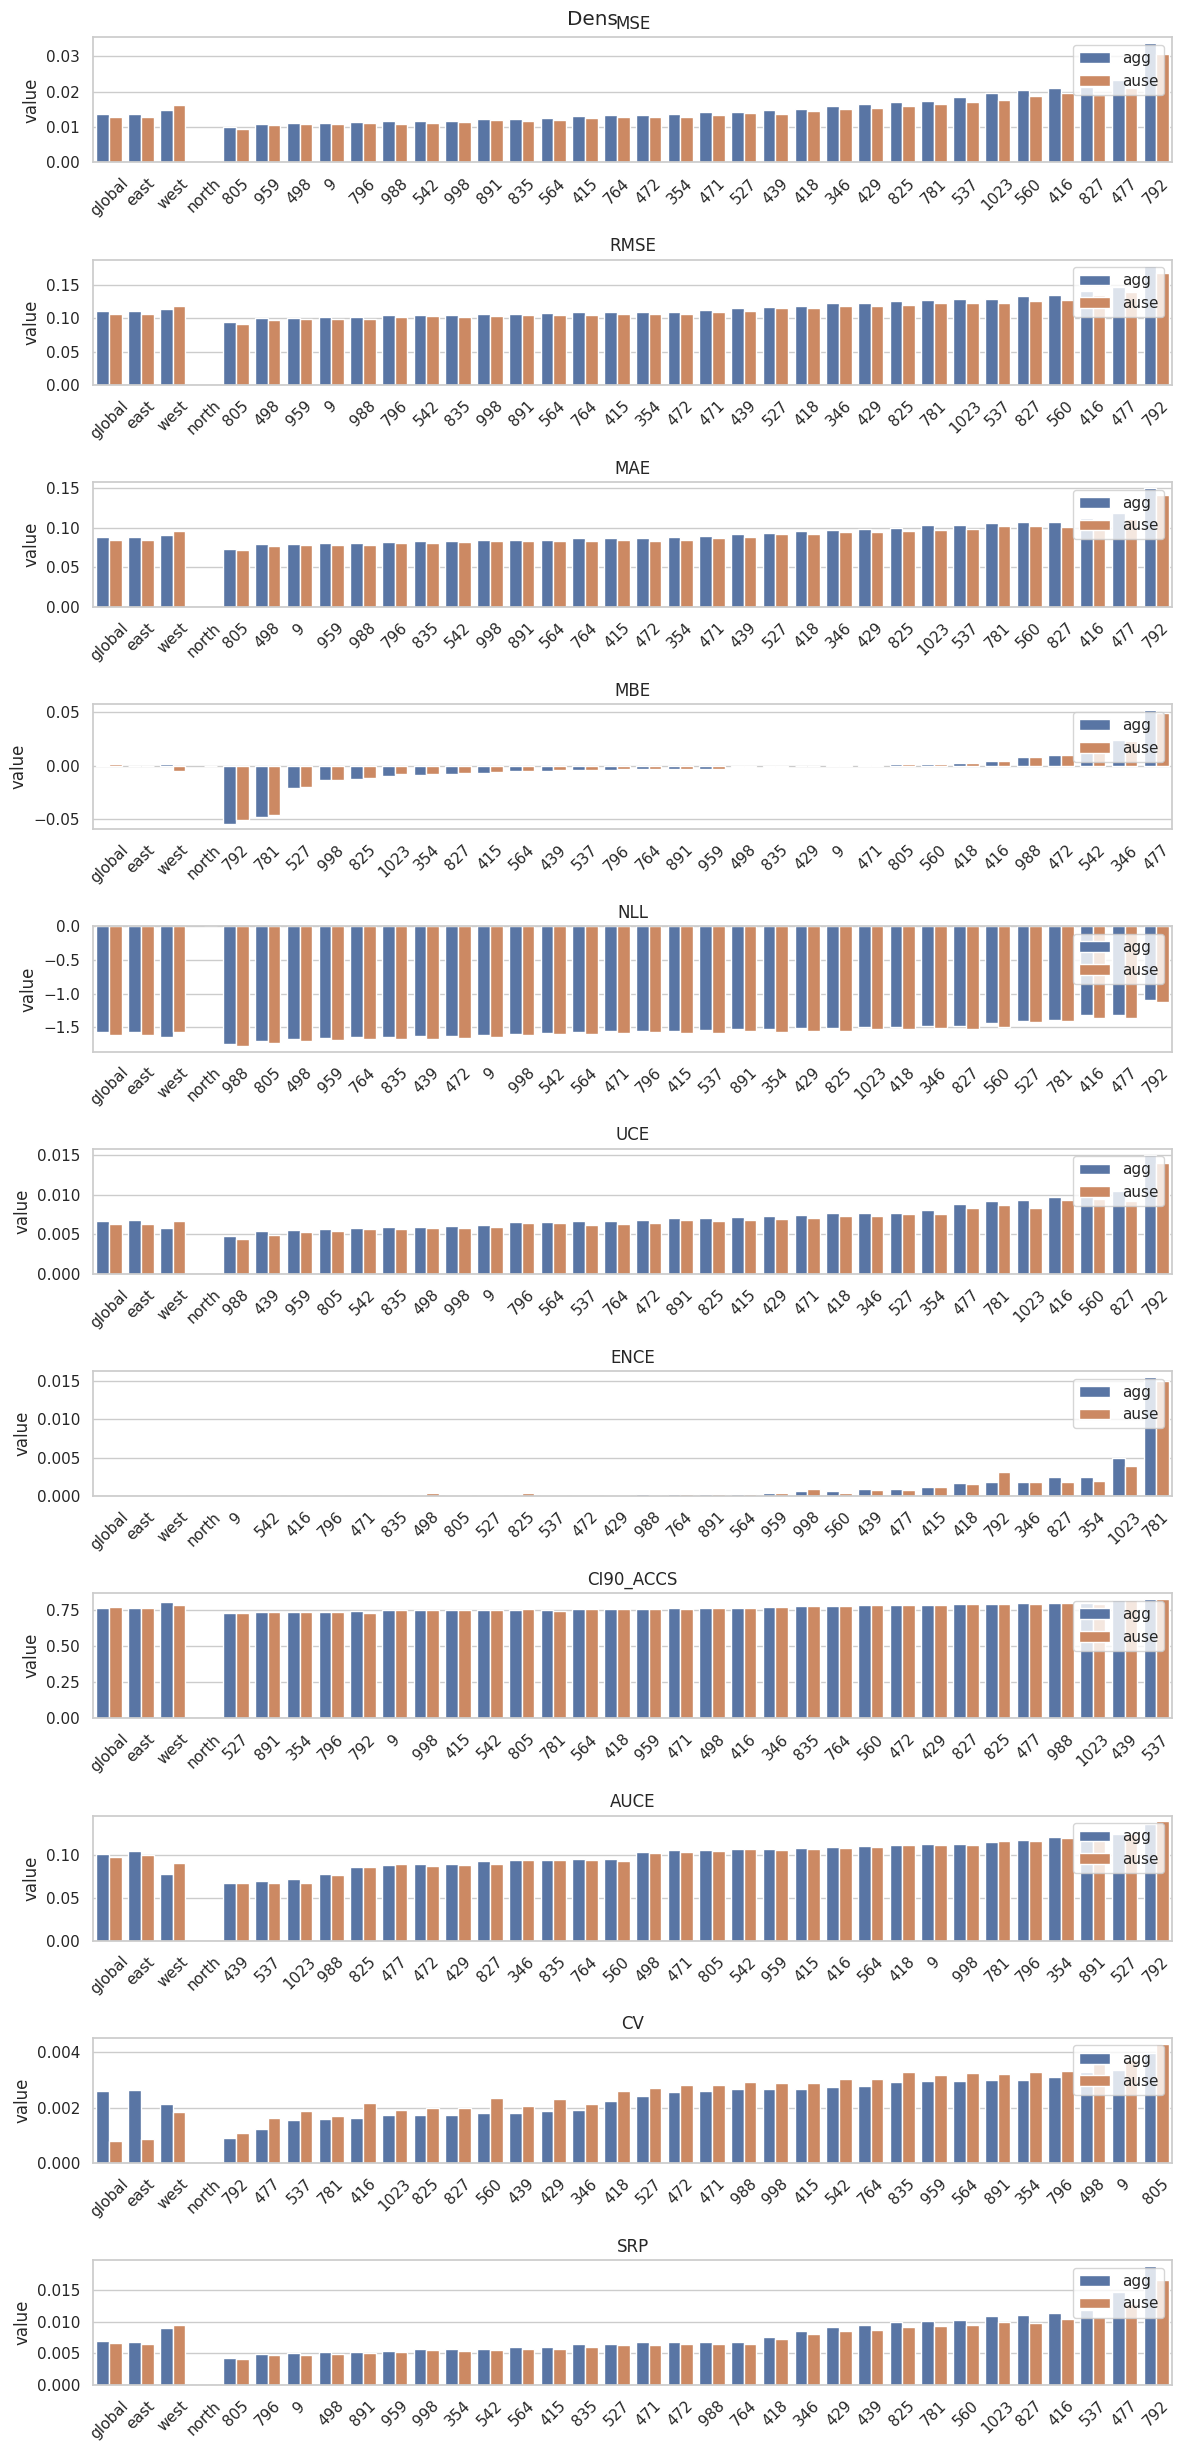

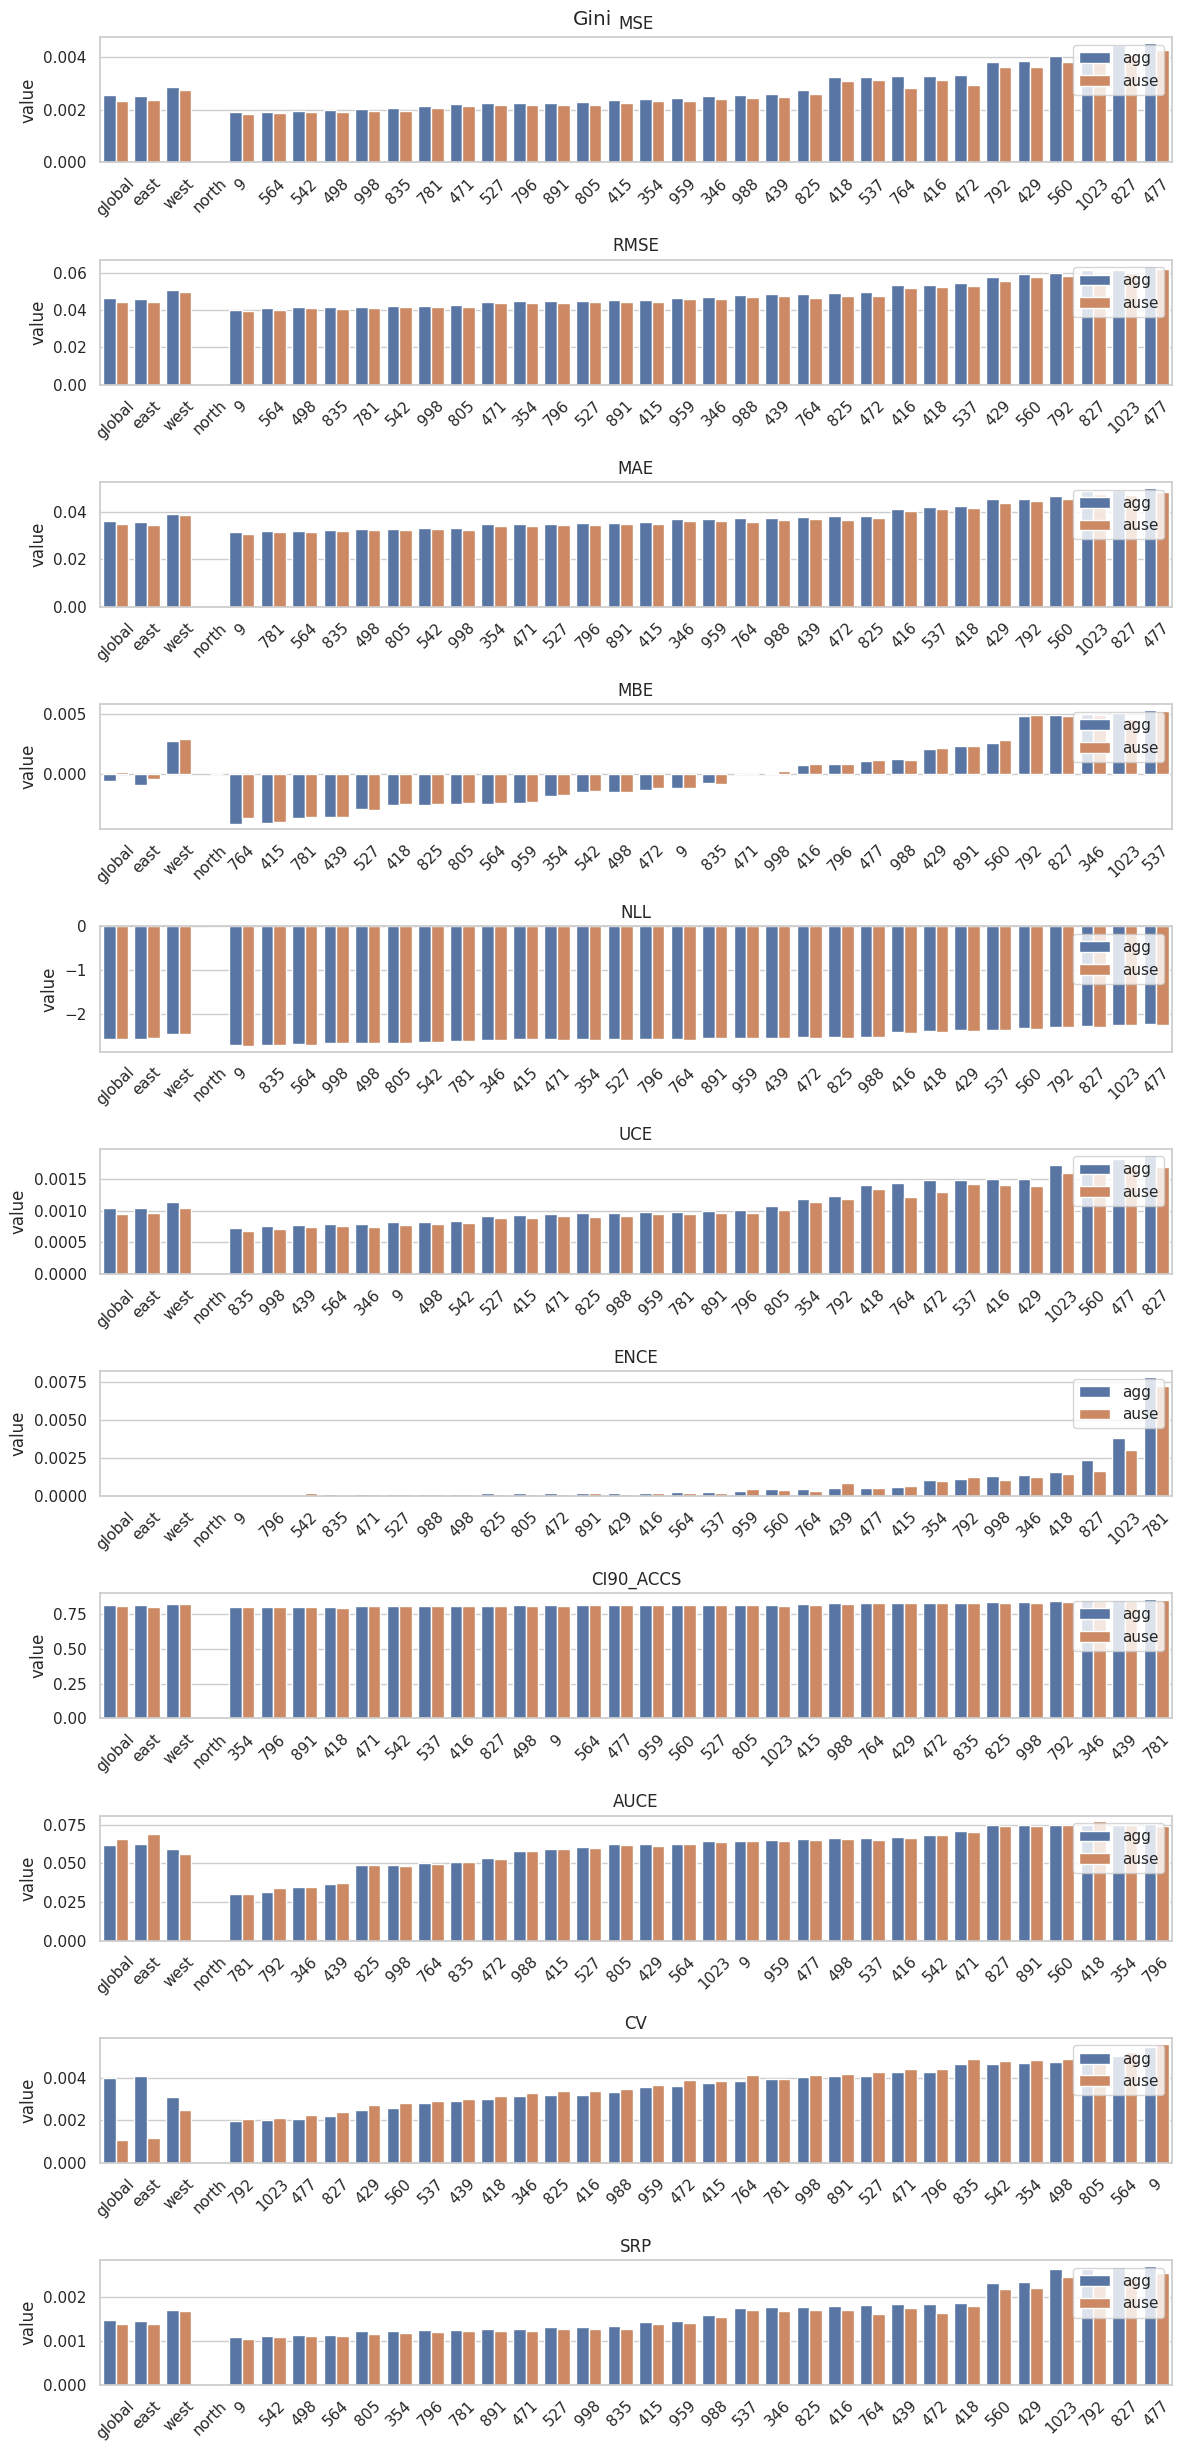

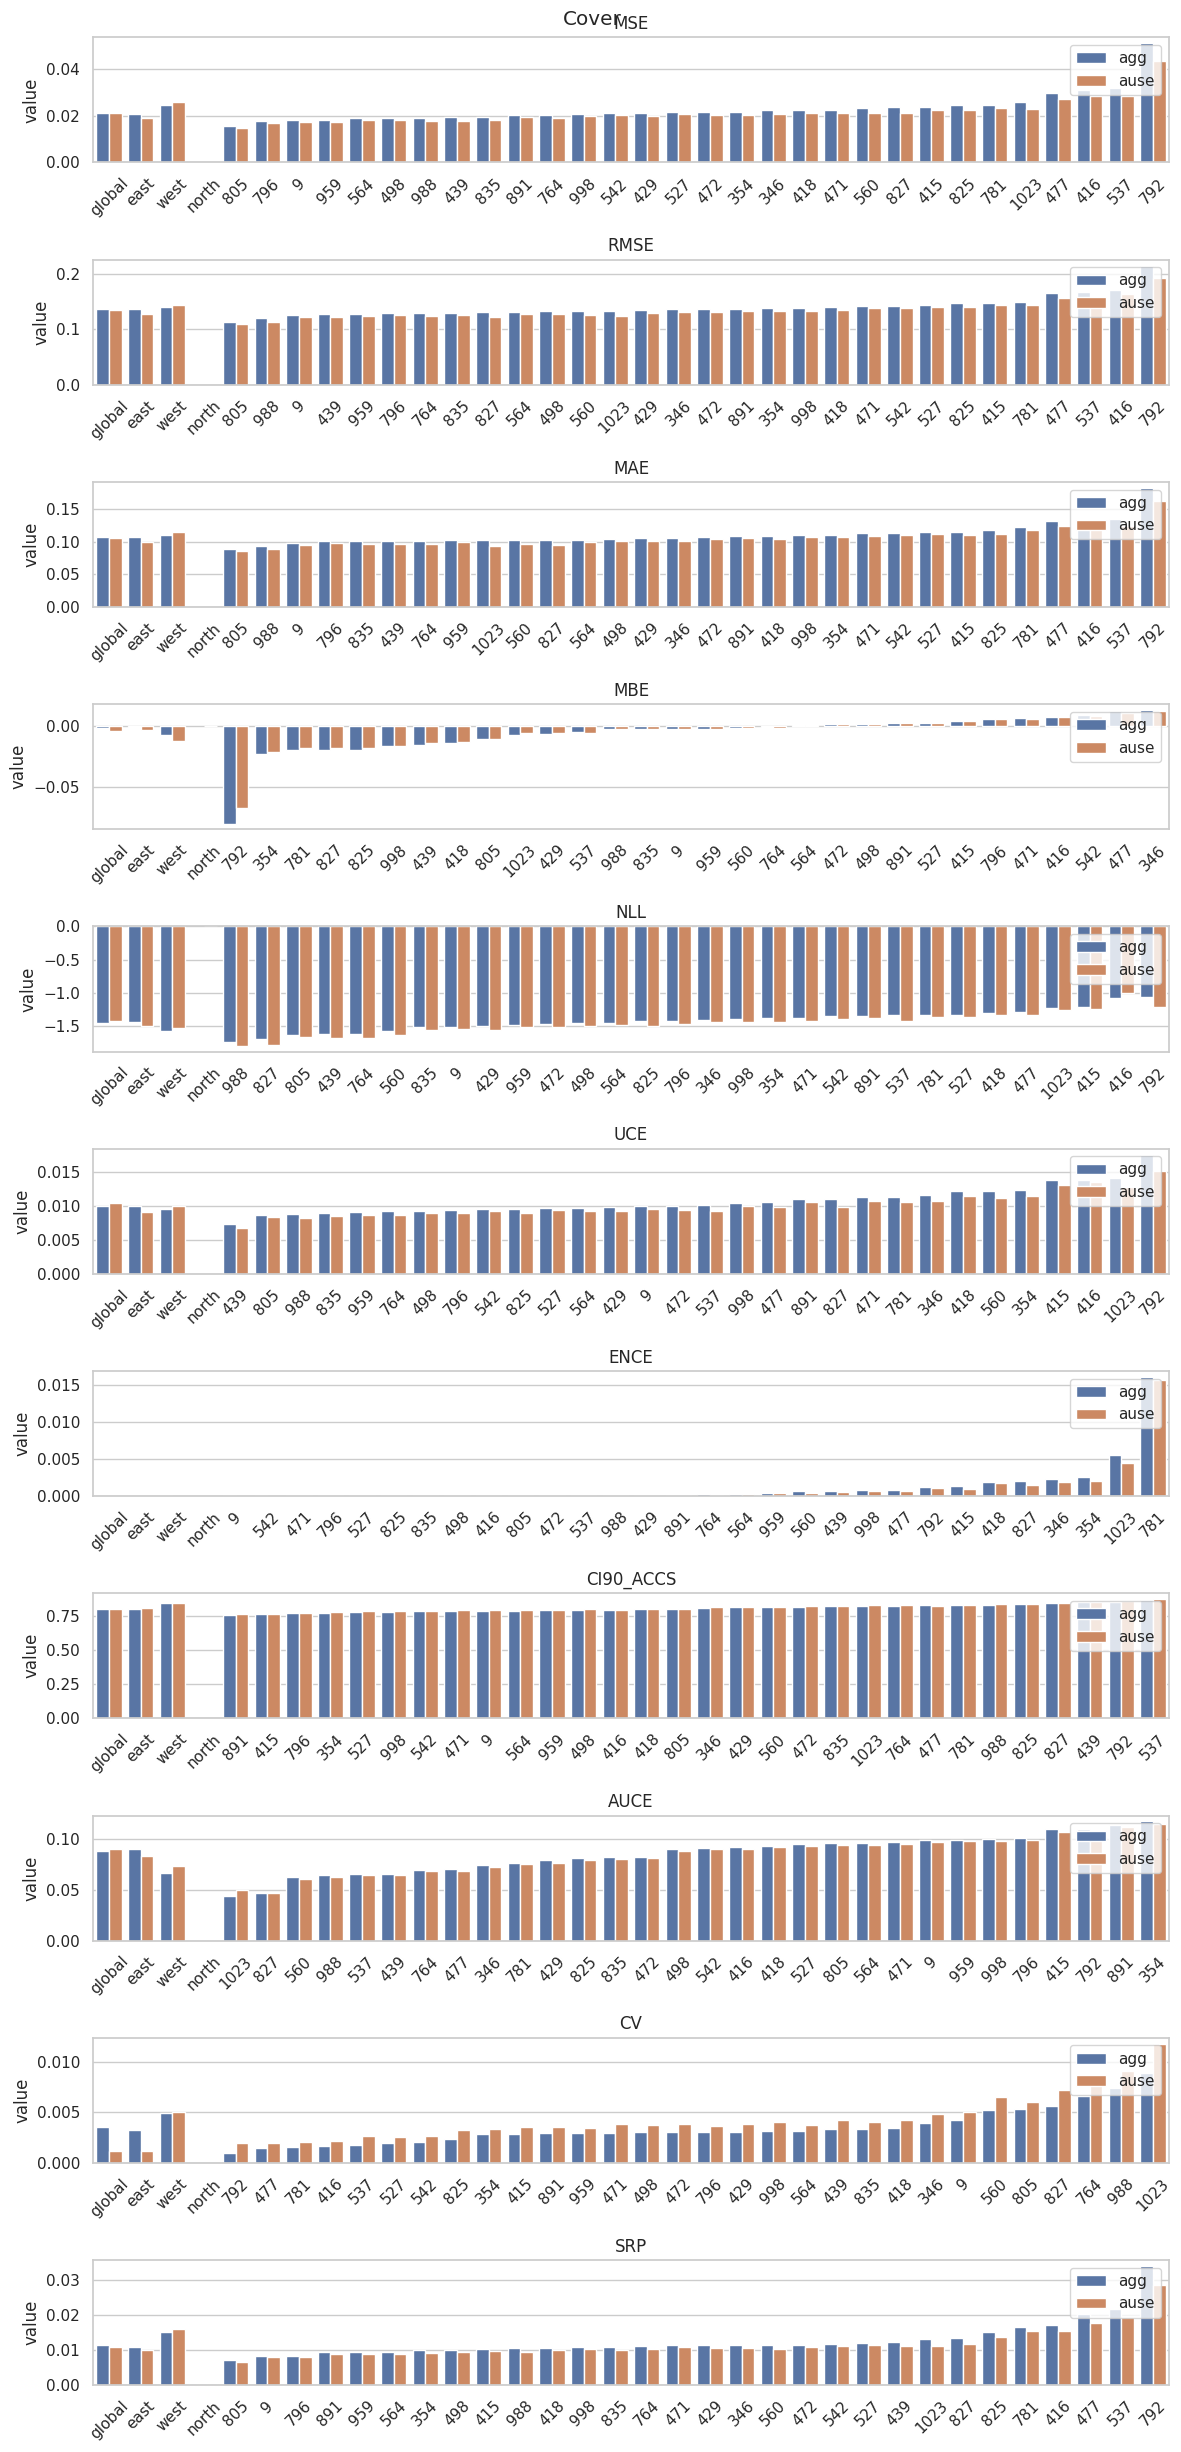

In [98]:
rcu.plot_results()